# PRAVEER RAJ 
## BATCH - MATHS AND COMPUTING
## WEEK 2
### ROLL NO. 1
#### Date: 13th January 2025 

Exercise 1 
1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear 
Regression given one predictor attribute and one response attribute. The function 
should return the coefficients of the straight line. 
2. Use mtcars data set and consider the attributes mpg and weight. Split data into train 
and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear 
regression model to predict mpg given the weight of the car. 
3. What is the mpg of a car, whose weight is 5.5? 
4. Compute and print accuracy measures such as RMSE and R2  for the test set.  
5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to 
enhance the accuracy and visualize the cost function. 

# EXERCISE 1

In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
def myFnLinReg(x, y):
    
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    
    model = LinearRegression()
    model.fit(x, y)
    
    
    m = model.coef_[0] 
    b = model.intercept_ 
    
    return m, b


x = [1, 2, 3, 4, 5] 
y = [4, 5, 8, 6, 9]  

m, b = myFnLinReg(x, y)
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 1.1
Intercept (b): 3.1


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def myFnLinReg(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    m = model.coef_[0]
    b = model.intercept_
    return m, b

df = pd.read_csv('mtcars.csv')

x = df['wt']
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

slope, intercept = myFnLinReg(x_train, y_train)

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

y_pred = slope * x_test + intercept

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Slope (m): -5.33694140055708
Intercept (b): 36.93731031351841
RMSE: 3.5321361326991383
R²: 0.6879761857596275


In [14]:
mpg_for_5_5 = slope * 5.5 + intercept
print(f"Predicted mpg for a car with weight 5.5: {mpg_for_5_5}")


Predicted mpg for a car with weight 5.5: 7.584132610454468


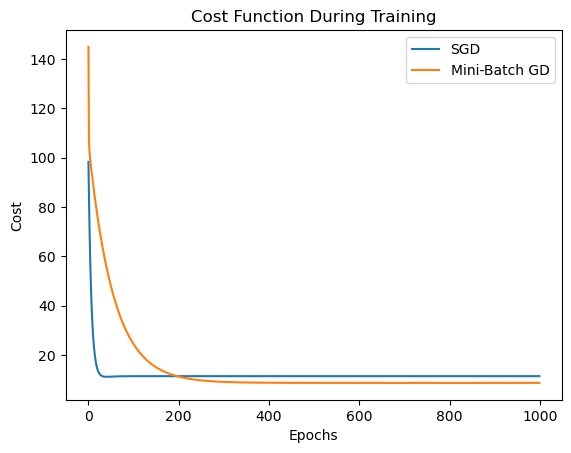

SGD Model Prediction (for car weight 5.5): [5.75210085]
Mini-Batch GD Model Prediction (for car weight 5.5): [7.95855908]
RMSE for SGD: 3.381694425536527
R² for SGD: 0.6750159015813408
RMSE for Mini-Batch GD: 2.949326946519021
R² for Mini-Batch GD: 0.7528052597717422


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cost(X, y, m, b):
    m_values = np.array(m)
    b_values = np.array(b)
    cost = np.mean((X @ m_values + b_values - y) ** 2)
    return cost

def stochastic_gradient_descent(X, y, learning_rate, epochs):
    m = np.zeros(X.shape[1])
    b = 0
    costs = []
    for epoch in range(epochs):
        for i in range(len(X)):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            prediction = xi @ m + b
            
            gradient_m = -2 * xi.T * (yi - prediction)
            gradient_b = -2 * (yi - prediction)
            
            
            m = m - learning_rate * gradient_m.flatten()
            b = b - learning_rate * gradient_b
        cost = compute_cost(X, y, m, b)
        costs.append(cost)
    return m, b, costs

def mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size):
    m = np.zeros(X.shape[1])
    b = 0
    costs = []
    for epoch in range(epochs):
        permutation = np.random.permutation(len(X))
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        
        for i in range(0, len(X), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            predictions = X_batch @ m + b
            errors = predictions - y_batch
            gradient_m = 2 * X_batch.T @ errors / batch_size
            gradient_b = 2 * np.sum(errors) / batch_size
            
            m = m - learning_rate * gradient_m
            b = b - learning_rate * gradient_b
        
        cost = compute_cost(X, y, m, b)
        costs.append(cost)
    return m, b, costs

df = pd.read_csv('mtcars.csv')
X = df['wt'].values.reshape(-1, 1)  
y = df['mpg'].values 

X_bias = np.c_[np.ones(X.shape[0]), X]

learning_rate = 0.01
epochs = 1000
batch_size = 10

m_sgd, b_sgd, costs_sgd = stochastic_gradient_descent(X_bias, y, learning_rate, epochs)

m_mbgd, b_mbgd, costs_mbgd = mini_batch_gradient_descent(X_bias, y, learning_rate, epochs, batch_size)

plt.plot(costs_sgd, label="SGD")
plt.plot(costs_mbgd, label="Mini-Batch GD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function During Training")
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
x_test = np.array([5.5]).reshape(-1, 1)
X_test_bias = np.c_[np.ones(x_test.shape[0]), x_test]

y_pred_sgd = X_test_bias @ m_sgd + b_sgd

y_pred_mbgd = X_test_bias @ m_mbgd + b_mbgd

rmse_sgd = np.sqrt(mean_squared_error(y, X_bias @ m_sgd + b_sgd))
r2_sgd = r2_score(y, X_bias @ m_sgd + b_sgd)

rmse_mbgd = np.sqrt(mean_squared_error(y, X_bias @ m_mbgd + b_mbgd))
r2_mbgd = r2_score(y, X_bias @ m_mbgd + b_mbgd)

print("SGD Model Prediction (for car weight 5.5):", y_pred_sgd)
print("Mini-Batch GD Model Prediction (for car weight 5.5):", y_pred_mbgd)
print(f"RMSE for SGD: {rmse_sgd}")
print(f"R² for SGD: {r2_sgd}")
print(f"RMSE for Mini-Batch GD: {rmse_mbgd}")
print(f"R² for Mini-Batch GD: {r2_mbgd}")


Exercise 2 
1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.  
2. Using sklearn.linear_model, find the multiple regression model for the boston.csv 
dataset using the best 3 features.  (from sklearn.linear_model import 
LinearRegression)  
3. Find the accuracy of the model using appropriate metrics using 80, 20 split for 
training and test.

# Exercise 2 



In [1]:
#Exercise 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston_data = pd.read_csv('Boston.csv')

correlation_matrix = boston_data.corr()
correlation_with_medv = correlation_matrix['medv'].drop('medv')
top_features = correlation_with_medv.abs().sort_values(ascending=False).head(5)

features = ['lstat', 'rm', 'ptratio']
X = boston_data[features]
y = boston_data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Top 5 Features Correlated with MEDV:")
print(top_features)
print("\nMean Squared Error (MSE):", mse)
print("R² Score:", r2)

Top 5 Features Correlated with MEDV:
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64

Mean Squared Error (MSE): 27.114957415580577
R² Score: 0.6302528487272827
